# Data Collection

Objetivo desse webinar √© descrever algumas formas principais de se coletar dados

## SQL 

* census_bureau_usa
* iowa_liquor_sales
* covid_19_geographic_distribution_worldwide


In [ ]:
"""
SELECT APPROX_QUANTILES(VARIACAO, 4) QUANTIS

FROM
(SELECT *,
      SAFE_DIVIDE(POPULATION_2010 - POPULATION_2000, POPULATION_2000) as VARIACAO,
FROM

(SELECT a.zipcode, 
       a.gender, 
       sum(a.population) as POPULATION_2000,
       sum(b.population) as POPULATION_2010

FROM `bigquery-public-data.census_bureau_usa.population_by_zip_2000` a
INNER JOIN `bigquery-public-data.census_bureau_usa.population_by_zip_2010` b on a.zipcode = b.zipcode AND a.gender = b.gender
group by zipcode, gender)

ORDER BY VARIACAO DESC)
"""

In [ ]:
"""
SELECT 
  date,
  daily_confirmed_cases,
  AVG(daily_confirmed_cases) OVER (PARTITION BY geo_id ORDER BY date ASC ROWS BETWEEN 7 PRECEDING AND CURRENT ROW) AS MEDIA_MOVEL_7,


FROM `bigquery-public-data.covid19_ecdc.covid_19_geographic_distribution_worldwide`
WHERE date >= "2020-06-01" AND date <= "2020-12-31" AND geo_id = "BR"
ORDER BY date
"""


## Lendo DataFrames diretamente da Web


In [33]:
import pandas as pd 
import numpy as np 
import datetime
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set_style('darkgrid')
# sns.set_context('talk')
sns.set_palette('rainbow')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

### CSVs

In [12]:
population = pd.read_csv("https://raw.githubusercontent.com/datasets/population/master/data/population.csv", sep = ',', on_bad_lines = 'skip')

In [13]:
population.head()

Country Name Country Code  Year      Value
0   Arab World          ARB  1960   92197753
1   Arab World          ARB  1961   94724510
2   Arab World          ARB  1962   97334442
3   Arab World          ARB  1963  100034179
4   Arab World          ARB  1964  102832760

### JSON

#### API do Banco Central do Brasil

Documenta√ß√£o: https://www3.bcb.gov.br/sgspub/localizarseries/localizarSeries.do?method=prepararTelaLocalizarSeries

In [34]:
bcb_series = {
    'ipca' : 433,
    'igpm' : 189,
    'selic' : 11,
    'meta_selic' : 432,
    'cdi' : 12,
    'pnad' : 24369,
    'cambio' : 1,
    'pib' : 4380
}

def get_data_bcb(series, start, end):
    now = datetime.datetime.now()
    if start is None:
        start = now

    if end is None:
        end = now

    if isinstance(start, str):
        start = datetime.datetime.strptime(start, "%Y-%m-%d")

    if isinstance(end, str):
        end = datetime.datetime.strptime(end, "%Y-%m-%d")

    if start > end:
        raise Exception("Start datetime is greater than end")

    dataInicial = start.strftime("%d/%m/%Y")
    dataFinal = end.strftime("%d/%m/%Y")

    if series.lower() in bcb_series.keys():
        codigo_serie = bcb_series[series.lower()]
    else:
        raise Exception("Series not found")

    url = f"http://api.bcb.gov.br/dados/serie/bcdata.sgs.{codigo_serie}/dados?formato=json&dataInicial={dataInicial}&dataFinal={dataFinal}"

    df = pd.DataFrame([])
    try:
        df = pd.read_json(url)
    except:
        print("Could not load data from bcb. Query string:", url)

    return df
    

In [35]:
import json 

In [36]:
ipca = get_data_bcb('ipca', "2010-01-01", "2022-01-01")

In [37]:
ipca.head()

data  valor
0  01/01/2010   0.75
1  01/02/2010   0.78
2  01/03/2010   0.52
3  01/04/2010   0.57
4  01/05/2010   0.43

In [38]:
ipca['data'] = pd.to_datetime(ipca['data'], format = "%d/%m/%Y")

In [ ]:
# SUM(IPCA) OVER (ORDER BY data ASC ROWS BETWEEN 12 PRECEDING AND CURRENT ROW)

In [39]:
ipca['ipca_ac'] = ipca['valor'].rolling(12).sum()

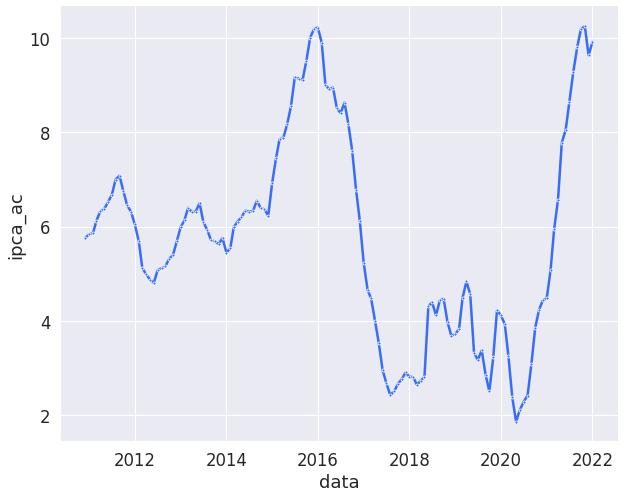

In [40]:
fig, ax = plt.subplots(figsize = (10,8))
sns.lineplot(ipca['data'], ipca['ipca_ac'], data = ipca, ax = ax, marker = '.')
sns.despine()

## Chamando APIs

### Google News

In [14]:
!pip install gnews

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 188 kB 5.3 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 115 kB 32.6 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 81 kB 7.0 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 62 kB 744 kB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 508 kB 12.2 MB/s 
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6066 sha256=1c6abee3c53543691501a412a9bf22720d1b272ec9295b74e1b37f8ae975f608
  Stored in directory: /root/.cache/pip/wheels/73/ad/a4/0dff4a6ef231fc0dfa12ffbac2a36cebfdddfe059f50e019aa
Successfully built sgmllib3k
  Att

In [15]:
from gnews import GNews

In [23]:
gnews = GNews(language = "EN", country = "US", period = "7d")
news = gnews.get_news("world cup")

In [24]:
news

[{'title': 'World Cup predictions: Soccer broadcasters make their picks - World Soccer Talk',
  'description': 'World Cup predictions: Soccer broadcasters make their picks  World Soccer Talk',
  'published date': 'Sat, 19 Nov 2022 08:00:00 GMT',
  'url': 'https://worldsoccertalk.com/news/world-cup-predictions-soccer-broadcasters-make-their-picks-20221110-WST-406704.html',
  'publisher': {'href': 'https://worldsoccertalk.com',
   'title': 'World Soccer Talk'}},
 {'title': 'Qatar made history in Ecuador match: Why there‚Äôs nothing to be proud of | Mint - Mint',
  'description': 'Qatar made history in Ecuador match: Why there‚Äôs nothing to be proud of | Mint  Mint',
  'published date': 'Mon, 21 Nov 2022 06:16:14 GMT',
  'url': 'https://www.livemint.com/news/world/qatar-made-history-in-fifa-world-cup-2022-match-against-ecuador-but-there-s-nothing-to-be-proud-of-11669008637170.html',
  'publisher': {'href': 'https://www.livemint.com', 'title': 'Mint'}},
 {'title': 'Who is Tim Weah? Inside

In [25]:
pd.DataFrame(news)

title  \
0   World Cup predictions: Soccer broadcasters mak...   
1   Qatar made history in Ecuador match: Why there...   
2   Who is Tim Weah? Inside the USMNT World Cup ro...   
3   The saddest moments in World Cup history - 90m...   
4   Americans kick off the World Cup: US fans pack...   
5   Who We‚Äôll Be Watching This World Cup: The Ital...   
6   World Cup 2022 Squads: All 832 players heading...   
7   France: William Saliba wants to emulate Thierr...   
8   Jack Wilshere gets the last laugh with Bukayo ...   
9   VAR and peace? Why tech-assisted refereeing wo...   
10  Karthik's unique response to Shastri's critici...   
11  A guide to World Cup Group A - Qatar, Ecuador,...   
12  'We'll be waiting..': Shoaib Akhtar shares mes...   
13  Gary Neville left sprawled over table in hyste...   
14  Injured England seamer Topley blasts unsafe 'T...   
15  England's first Test in Pakistan could be move...   
16  I Want To Play Cricket And Management Is Ignor...   
17  Wayne Rooney appears to back Manchester United...   
18  Best Outdoor Gifts: Our Favorite Head-to-Toe G...   
19  Leroy Sane‚Äôs World Cup at risk as Bayern confi...   
20  Italy‚Äôs woeful World Cup defence in 2010 with ...   

                                          description  \
0   World Cup predictions: Soccer broadcasters mak...   
1   Qatar made history in Ecuador match: Why there...   
2   Who is Tim Weah? Inside the USMNT World Cup ro...   
3   The saddest moments in World Cup history  90mi...   
4   Americans kick off the World Cup: US fans pack...   
5   Who We‚Äôll Be Watching This World Cup: The Ital...   
6   World Cup 2022 Squads: All 832 players heading...   
7   France: William Saliba wants to emulate Thierr...   
8   Jack Wilshere gets the last laugh with Bukayo ...   
9   VAR and peace? Why tech-assisted refereeing wo...   
10  Karthik's unique response to Shastri's critici...   
11  A guide to World Cup Group A - Qatar, Ecuador,...   
12  'We'll be waiting..': Shoaib Akhtar shares mes...   
13  Gary Neville left sprawled over table in hyste...   
14  Injured England seamer Topley blasts unsafe 'T...   
15  England's first Test in Pakistan could be move...   
16  I Want To Play Cricket And Management Is Ignor...   
17  Wayne Rooney appears to back Manchester United...   
18  Best Outdoor Gifts: Our Favorite Head-to-Toe G...   
19  Leroy Sane‚Äôs World Cup at risk as Bayern confi...   
20  Italy‚Äôs woeful World Cup defence in 2010 with ...   

                   published date  \
0   Sat, 19 Nov 2022 08:00:00 GMT   
1   Mon, 21 Nov 2022 06:16:14 GMT   
2   Tue, 22 Nov 2022 12:40:21 GMT   
3   Wed, 09 Nov 2022 08:00:00 GMT   
4   Mon, 21 Nov 2022 08:00:00 GMT   
5   Sun, 20 Nov 2022 08:00:00 GMT   
6   Sun, 20 Nov 2022 08:00:00 GMT   
7   Thu, 10 Nov 2022 08:00:00 GMT   
8   Mon, 21 Nov 2022 08:00:00 GMT   
9   Fri, 18 Nov 2022 08:00:00 GMT   
10  Sun, 20 Nov 2022 08:00:00 GMT   
11  Fri, 18 Nov 2022 07:00:00 GMT   
12  Wed, 09 Nov 2022 08:00:00 GMT   
13  Thu, 17 Nov 2022 08:00:00 GMT   
14  Wed, 02 Nov 2022 07:00:00 GMT   
15  Tue, 15 Nov 2022 08:00:00 GMT   
16  Sun, 20 Nov 2022 08:35:03 GMT   
17  Fri, 18 Nov 2022 08:00:00 GMT   
18  Fri, 18 Nov 2022 08:00:00 GMT   
19  Tue, 18 Oct 2022 07:00:00 GMT   
20  Wed, 26 Oct 2022 07:00:00 GMT   

                                                  url  \
0   https://worldsoccertalk.com/news/world-cup-pre...   
1   https://www.livemint.com/news/world/qatar-made...   
2   https://www.foxsports.com/stories/soccer/usmnt...   
3   https://www.90min.com/posts/the-saddest-moment...   
4   https://www.dailymail.co.uk/sport/football/art...   
5   https://www.chiesaditotti.com/2022/11/20/23467...   
6   https://www.mirror.co.uk/sport/football/news/w...   
7   https://www.dailymail.co.uk/sport/football/art...   
8   https://www.mirror.co.uk/sport/football/news/w...   
9   https://theconversation.com/var-and-peace-why-...   
10  https://www.hindustantimes.com/cricket/after-2...   
11  https://inews.co.uk/spo

### Yahoo Finance

In [26]:
!pip install yahooquery

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 46 kB 1.8 MB/s 


In [27]:
from yahooquery import Ticker

In [28]:
ticker = Ticker("AAPL") 
data = ticker.history(start = "2020-01-01", end = "2022-01-01", interval = '1d')

In [29]:
data = data.reset_index()

In [30]:
data.head()

symbol        date       high     volume        low       open      close  \
0   AAPL  2020-01-02  75.150002  135480400  73.797501  74.059998  75.087502   
1   AAPL  2020-01-03  75.144997  146322800  74.125000  74.287498  74.357498   
2   AAPL  2020-01-06  74.989998  118387200  73.187500  73.447502  74.949997   
3   AAPL  2020-01-07  75.224998  108872000  74.370003  74.959999  74.597504   
4   AAPL  2020-01-08  76.110001  132079200  74.290001  74.290001  75.797501   

    adjclose  dividends  splits  
0  73.561531        0.0     0.0  
1  72.846375        0.0     0.0  
2  73.426819        0.0     0.0  
3  73.081497        0.0     0.0  
4  74.257103        0.0     0.0

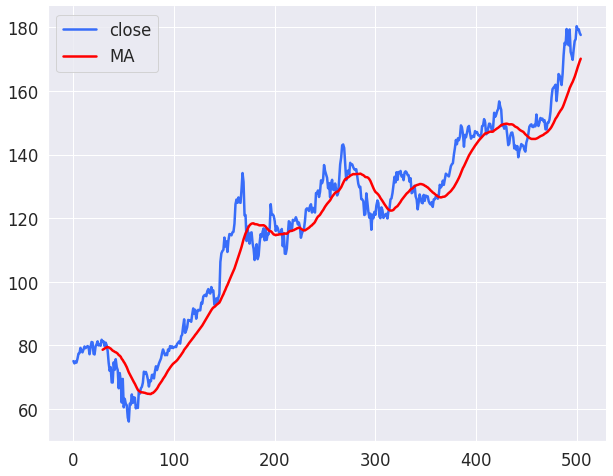

In [41]:
fig, ax = plt.subplots(figsize = (10, 8))
ax.plot(data['close'], label = 'close')
ax.plot(data['close'].rolling(30).mean(), color = 'red', label = 'MA')
plt.legend()
sns.despine()

### COVID

Documenta√ß√£o: https://documenter.getpostman.com/view/10808728/SzS8rjbc#00030720-fae3-4c72-8aea-ad01ba17adf8

In [46]:
import requests

In [54]:
population = population[population['Year'] == population['Year'].max()]
population.rename(columns = {'Country Name' : 'Country'}, inplace = True)

In [48]:
countries_url = "https://api.covid19api.com/countries"

response = requests.request("GET", countries_url)
data = response.json()
countries = pd.DataFrame(data)

url = "https://api.covid19api.com/dayone/country/south-africa/status/confirmed"



In [55]:
countries = pd.merge(left = countries, right = population, on = 'Country')

In [60]:
countries.isna().mean()

Country         0.0
Slug            0.0
ISO2            0.0
Country Code    0.0
Year            0.0
Value           0.0
dtype: float64

In [62]:
biggest_countries = countries.sort_values(by = 'Value', ascending = False).head(10)['Slug'].values

In [63]:
biggest_countries

array(['china', 'india', 'indonesia', 'pakistan', 'brazil', 'nigeria',
       'bangladesh', 'russia', 'japan', 'mexico', 'ethiopia',
       'philippines', 'germany', 'turkey', 'thailand', 'france',
       'united-kingdom', 'italy', 'south-africa', 'myanmar'], dtype=object)

In [64]:
from tqdm import tqdm
import time

In [97]:
headers = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.142 Safari/537.36'}

In [99]:
dfs = []
for country in tqdm(biggest_countries):
  confirmed_url = f"https://api.covid19api.com/dayone/country/{country}/status/confirmed"
  response = requests.request("GET", confirmed_url, headers = headers)
  data = response.json()
  try:
    dfs.append(pd.DataFrame(data))
  except Exception as e:
    print(e)
    print(country, data)
  time.sleep(0.5)

covid = pd.concat(dfs, ignore_index = True)

In [96]:
confirmed_url

'https://api.covid19api.com/dayone/country/china/status/deaths'

In [104]:
covid.head()

Country CountryCode  Province City CityCode    Lat     Lon  Cases  \
0   China          CN     Hubei                30.98  112.27    444   
1   China          CN    Shanxi                37.58  112.29      1   
2   China          CN     Henan                33.88  113.61      5   
3   China          CN   Jiangxi                27.61  115.72      2   
4   China          CN  Shandong                36.34  118.15      2   

      Status                      Date  
0  confirmed 2020-01-22 00:00:00+00:00  
1  confirmed 2020-01-22 00:00:00+00:00  
2  confirmed 2020-01-22 00:00:00+00:00  
3  confirmed 2020-01-22 00:00:00+00:00  
4  confirmed 2020-01-22 00:00:00+00:00

In [72]:
covid['Date'] = pd.to_datetime(covid['Date'])

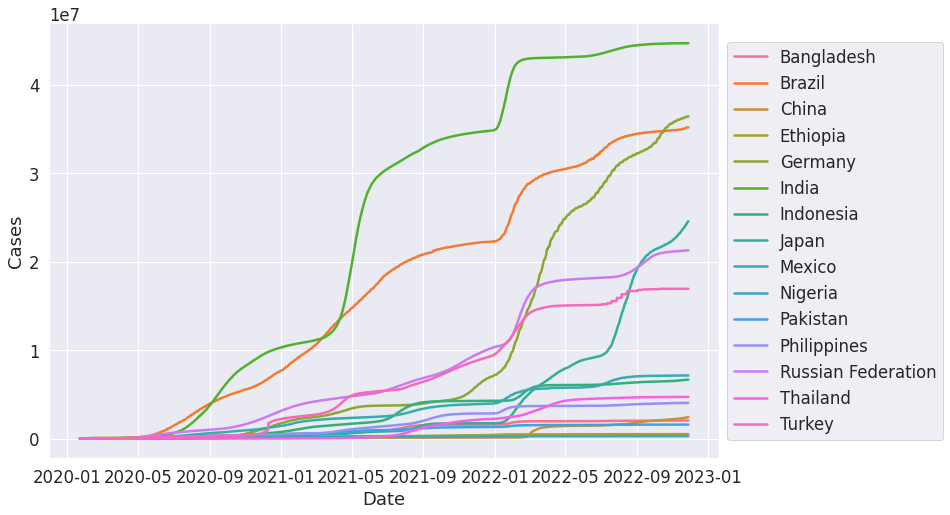

In [75]:
covid_country = covid.groupby(['Country', 'Date'])['Cases'].sum().reset_index()

fig, ax = plt.subplots(figsize = (12,8))
sns.lineplot('Date', 'Cases', hue = 'Country', data = covid_country, ax = ax)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

In [78]:
covid = pd.merge(left = covid, right = countries, on = ['Country'], how = 'left')

In [79]:
covid.head()

Country CountryCode  Province City CityCode    Lat     Lon  Cases  \
0   China          CN     Hubei                30.98  112.27    444   
1   China          CN    Shanxi                37.58  112.29      1   
2   China          CN     Henan                33.88  113.61      5   
3   China          CN   Jiangxi                27.61  115.72      2   
4   China          CN  Shandong                36.34  118.15      2   

      Status                      Date   Slug ISO2 Country Code  Year  \
0  confirmed 2020-01-22 00:00:00+00:00  china   CN          CHN  2018   
1  confirmed 2020-01-22 00:00:00+00:00  china   CN          CHN  2018   
2  confirmed 2020-01-22 00:00:00+00:00  china   CN          CHN  2018   
3  confirmed 2020-01-22 00:00:00+00:00  china   CN          CHN  2018   
4  confirmed 2020-01-22 00:00:00+00:00  china   CN          CHN  2018   

        Value  
0  1392730000  
1  1392730000  
2  1392730000  
3  1392730000  
4  1392730000

In [80]:
covid['Cases_per_100k'] = covid['Cases'] * 100000 / covid['Value']

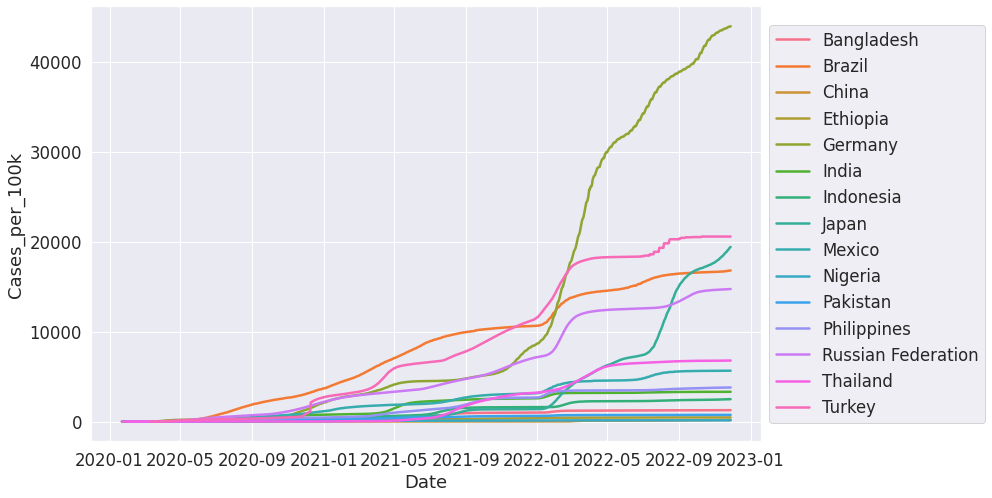

In [82]:
covid_country = covid.groupby(['Country', 'Date'])['Cases_per_100k'].sum().reset_index()

fig, ax = plt.subplots(figsize = (12,8))
sns.lineplot('Date', 'Cases_per_100k', hue = 'Country', data = covid_country, ax = ax)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

### Twitter

In [107]:
import yaml 
import requests
import json 
from datetime import datetime
from pathlib import Path


In [109]:
with open(Path("config.yaml"), 'r') as f: 
  config = yaml.safe_load(f)

bearer_token = config['twitter_token']
all_url = "https://api.twitter.com/2/tweets/search/all"
recent_url = "https://api.twitter.com/2/tweets/search/recent"

def create_headers(bearer_token):
  headers = {"Authorization": "Bearer {}".format(bearer_token)}
  return headers

def connect_to_endpoint(url, headers, params, encoding = "ISO-8859-1"):
  response = requests.request("GET", url, headers=headers, params=params)
  if response.status_code != 200:
      raise Exception(response.status_code, response.text)
  return response.json()

In [110]:
import datetime
from dateutil.relativedelta import relativedelta

end = datetime.datetime.now(datetime.timezone.utc) - relativedelta(days = 1)
begin = end - relativedelta(days = 5)

In [111]:
max_count = 10
from_date = begin.isoformat()
to_date = end.isoformat()
filters = "World Cup"

params = {
    "query": fr"(\{filters}) (lang:en)",
    "tweet.fields": "created_at,lang,author_id,public_metrics",
}

if max_count:
    params['max_results'] = str(max_count)
if from_date:
    params["start_time"] = from_date
if to_date:
    params["end_time"] = to_date

headers = create_headers(bearer_token)
json_response = connect_to_endpoint(recent_url, headers, params)

for d in json_response['data']:
    d['reply_count'] = d['public_metrics']['reply_count']
    d['like_count'] = d['public_metrics']['like_count']
    d['quote_count'] = d['public_metrics']['quote_count']
    d['retweet_count'] = d['public_metrics']['retweet_count']
    d.pop('public_metrics', 'None')

df = pd.DataFrame(json_response['data'])

In [112]:
df.head()

text  \
0  RT @timurkuran: A Party that locks down people...   
1  @andy_murray @piersmorgan @Cristiano @B_Fernan...   
2  RT @brfootball: Ghana and Uruguay will meet in...   
3  @CLMWSN_10 @LBC No, we can't. Football's World...   
4  RT @DanielRegha: Ghana is the first African te...   

                 created_at edit_history_tweet_ids lang                   id  \
0  2022-11-28T22:33:57.000Z  [1597358161870352384]   en  1597358161870352384   
1  2022-11-28T22:33:57.000Z  [1597358161635135491]   en  1597358161635135491   
2  2022-11-28T22:33:57.000Z  [1597358161027293184]   en  1597358161027293184   
3  2022-11-28T22:33:57.000Z  [1597358160427507714]   en  1597358160427507714   
4  2022-11-28T22:33:57.000Z  [1597358159911612417]   en  1597358159911612417   

             author_id  reply_count  like_count  quote_count  retweet_count  
0  1192915579553927168            0           0            0            130  
1  1551089089889419264            0           0            0              0  
2            517068220            0           0            0           1239  
3  1109211367989563392            1           1            0              0  
4           2475701906            0           0            0            959

In [113]:
import re

def cleaning_tweets(text):
    whitespace = re.compile(r"\s+")
    user = re.compile(r"(?i)@[a-z0-9_]+")
    user_reddit = re.compile(r"(?i)u/[a-z0-9_]+")

    text = whitespace.sub(" ", text)
    text = user.sub("", text)
    text = user_reddit.sub("", text)
    text = text.replace("\n", " ")
    # text = re.sub('\[.*?\]', '', text)
    # text = re.sub('<.*?>+', '', text)
    text = re.sub(r"https?\S+", "", text)
    text = re.sub(r"&.*?;", "", text)
    text = re.sub(r"<.*?>", "", text)
    # text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = text.replace("RT", "")
    text = text.replace(u"‚Ä¶", "")
    text = text.strip()
    return text


df['text'] = df['text'].apply(cleaning_tweets)

In [115]:
df.head()

text  \
0  : A Party that locks down people indefinitely ...   
1  Ghana beats south Korea 3-2 to record first wi...   
2  : Ghana and Uruguay will meet in an important ...   
3  No, we can't. Football's World Cup offers a gl...   
4  : Ghana is the first African team to score goa...   

                 created_at edit_history_tweet_ids lang                   id  \
0  2022-11-28T22:33:57.000Z  [1597358161870352384]   en  1597358161870352384   
1  2022-11-28T22:33:57.000Z  [1597358161635135491]   en  1597358161635135491   
2  2022-11-28T22:33:57.000Z  [1597358161027293184]   en  1597358161027293184   
3  2022-11-28T22:33:57.000Z  [1597358160427507714]   en  1597358160427507714   
4  2022-11-28T22:33:57.000Z  [1597358159911612417]   en  1597358159911612417   

             author_id  reply_count  like_count  quote_count  retweet_count  
0  1192915579553927168            0           0            0            130  
1  1551089089889419264            0           0            0              0  
2            517068220            0           0            0           1239  
3  1109211367989563392            1           1            0              0  
4           2475701906            0           0            0            959

In [118]:
df['text'].values

array([': A Party that locks down people indefinitely and keeps them under constant surveillance failed to foresee that images of mas',
       'Ghana beats south Korea 3-2 to record first win at the ongoing world cup In Qatar. YOU CAN WATCH VIDEO of GOALS, ANALYSIS And STATS HEREüëá',
       ': Ghana and Uruguay will meet in an important game at the World Cup. Again üôÉ',
       "No, we can't. Football's World Cup offers a global platform. It's watched by million across the planet, rich and poor. Of course people will use it to highlight their cause. Specially against the background of Fifa corruption and Qatar's dismal human rights record.",
       ': Ghana is the first African team to score goals in the 2022 World Cup,  against a strong contender (Portugal); The Black S',
       ': Richarlison on hooking up with Anitta: ‚ÄúBro, I did not get her. But if she wants it, I want it. After I win the World Cup,',
       ": Confused about what's going on between the U.S. and Iranian teams 

#### An√°lise de Sentimentos

In [119]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 5.5 MB 4.9 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 182 kB 56.9 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 7.6 MB 43.5 MB/s 


In [120]:
!pip install sentencepiece


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1.3 MB 5.2 MB/s 


In [121]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from transformers import MarianTokenizer, MarianMTModel
from scipy.special import softmax

In [122]:
task='sentiment'
MODEL = f"cardiffnlp/twitter-roberta-base-{task}"
sent_tokenizer = AutoTokenizer.from_pretrained(MODEL)
sent_model = AutoModelForSequenceClassification.from_pretrained(MODEL)

Downloading:   0%|          | 0.00/747 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [123]:
text_to_predict = df['text'].ravel().tolist()

In [124]:
text_to_predict

[': A Party that locks down people indefinitely and keeps them under constant surveillance failed to foresee that images of mas',
 'Ghana beats south Korea 3-2 to record first win at the ongoing world cup In Qatar. YOU CAN WATCH VIDEO of GOALS, ANALYSIS And STATS HEREüëá',
 ': Ghana and Uruguay will meet in an important game at the World Cup. Again üôÉ',
 "No, we can't. Football's World Cup offers a global platform. It's watched by million across the planet, rich and poor. Of course people will use it to highlight their cause. Specially against the background of Fifa corruption and Qatar's dismal human rights record.",
 ': Ghana is the first African team to score goals in the 2022 World Cup,  against a strong contender (Portugal); The Black S',
 ': Richarlison on hooking up with Anitta: ‚ÄúBro, I did not get her. But if she wants it, I want it. After I win the World Cup,',
 ": Confused about what's going on between the U.S. and Iranian teams ahead of tomorrow's match?  has an expla",

In [125]:
encoded_input = sent_tokenizer(text_to_predict, return_tensors='pt', padding = True)
output = sent_model(**encoded_input)
scores = output[0].detach().numpy()
scores = softmax(scores, axis = 1)
df[['Negative', "Neutral", "Positive"]] = scores

In [126]:
df[['text', 'Negative', "Neutral", "Positive"]].head(10)

text  Negative   Neutral  \
0  : A Party that locks down people indefinitely ...  0.921749  0.075347   
1  Ghana beats south Korea 3-2 to record first wi...  0.006700  0.526565   
2  : Ghana and Uruguay will meet in an important ...  0.074159  0.652045   
3  No, we can't. Football's World Cup offers a gl...  0.267468  0.483198   
4  : Ghana is the first African team to score goa...  0.004126  0.503759   
5  : Richarlison on hooking up with Anitta: ‚ÄúBro,...  0.142303  0.697458   
6  : Confused about what's going on between the U...  0.303876  0.678571   
7  : France, Brazil and Portugal have all qualifi...  0.001948  0.281906   
8  : A man ran into the field during World Cup ma...  0.018652  0.590297   
9  Joe Rodon cannot wait for the 'brilliant chall...  0.005894  0.125180   

   Positive  
0  0.002904  
1  0.466735  
2  0.273796  
3  0.249335  
4  0.492115  
5  0.160239  
6  0.017553  
7  0.716146  
8  0.391051  
9  0.868927